# <center>**Tecnológico de Costa Rica**`</center>

![TEC](https://asedp.cr/wp-content/uploads/2020/07/logo-TEC.jpg)

***IC-6200 / Inteligencia artificial***

Profesor


*   **Efren Jimenez Delgado**

### ***Notas***

**Algoritmos supervisados**


*   **Predicción**


1.   **Regresión lineal**
2.   Series de tiempo


---


*   Clasificación

**Algoritmos no supervisados**


*   Agrupación


---


*   Asociación



# **Regresion lineal**

La regresión lineal simple son métodos estadísticos que estudian la relación lineal existente entre dos o más variables.

## ***Tipos de regresión***



*   **Regresion lineal simple**
*   **Regresion lineal multiple**

**@Regresion lineal simple**

![TEC](https://www.gestiondeoperaciones.net/wp-content/uploads/2014/02/regresion-lineal-ajustada-e.gif)

**@Regresion lineal multiple**

![TEC](https://miro.medium.com/max/928/1*uqZFeQ0MlZ8nhaX2c4bAWw.png)

**Correlación lineal**

Para estudiar la relación lineal existente entre dos variables continuas es necesario disponer de parámetros que permitan cuantificar dicha relación. Uno de estos parámetros es la covarianza, que indica el grado de variación conjunta de dos variables aleatorias.


\begin{equation}
\text { Covarianza muestral }=\operatorname{Cov}(X, Y)=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{N-1}
\end{equation}


siendo $\bar{ x }$ e $\bar{y}$ la media de cada variable y ${ x_{i} }$ e ${ y_{i} }$ el valor de las variables para la observación ${ i }$.

La covarianza depende de las escalas en que se miden las variables estudiadas, por lo tanto, no es comparable entre distintos pares de variables.

Para poder hacer comparaciones se estandariza la covarianza, generando lo que se conoce como coeficientes de correlación. Existen diferentes tipos, de entre los que destacan el coeficiente de **Pearson, Rho de Spearman y Tau de Kendall**.

*   Todos ellos varían entre +1 y -1.

> Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.

*   Se emplean como medida de fuerza de asociación (tamaño del efecto):


> *  0: asociación nula.
> *  0.1: asociación pequeña.
> * 0.3: asociación mediana.
> * 0.5: asociación moderada.
> * 0.7: asociación alta.
> * 0.9: asociación muy alta.

![coorelacion](https://www.ingenieriaindustrialonline.com/wp-content/uploads/2019/07/Sin-t%C3%ADtulo-175.png)

![coorelacion2](https://www.maximaformacion.es/wp-content/uploads/2021/07/Que-es-la-correlacion_valores-del-coeficiente.png)


**Las principales diferencias entre estos tres coeficientes de asociación son:**

*   La correlación de **Pearson** funciona bien con variables cuantitativas que tienen una distribución normal.

*   La correlación de **Spearman** se emplea cuando los datos son ordinales, de intervalo, o bien cuando no se satisface la condición de normalidad para variables continuas y los datos se pueden transformar a rangos. Es un método no paramétrico.

*   La correlación de **Kendall** es otra alternativa no paramétrica para el estudio de la correlación que trabaja con rangos. Se emplea cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras.

*   Además del valor obtenido para el coeficiente de correlación, es necesario calcular su significancia.

Solo si el **p-value** es significativo se puede aceptar que existe correlación, y esta será de la magnitud que indique el coeficiente.

Por muy cercano que sea el valor del coeficiente de correlación a +1 o −1, si no es significativo, se ha de interpretar que la correlación de ambas variables es 0, ya que el valor observado puede deberse a simple aleatoriedad.


![p_value](https://vitalflux.com/wp-content/uploads/2018/07/p-value.png?ezimgfmt=ng:webp/ngcb1)



### **Ejemplo correlación**

Se dispone de un data set con información sobre diferentes coches. Se quiere estudiar si existe una correlación entre el peso de un vehículo (Weight) y la potencia de su motor (Horsepower).

R contiene funciones que permiten calcular los diferentes tipos de correlaciones y sus niveles de significancia: cor() y cor.test(). La segunda función es más completa ya que además de calcular el coeficiente de correlación indica su significancia (p-value) e intervalo de confianza.


**Nota**

Tipo de variables estadísticas

![variables](http://segasi.com.mx/clases/cide/recursos/tipo_variables_11.png)

## librerías


In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import t

import requests

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

#### Descargar archivo desde github

In [ ]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/Cars93.csv"
response = requests.get(url)
if response.status_code == 200:
    cars93 = pd.read_csv(url)
else:
    print("Error al descargar el archivo.")

En Python, si ya ha descargado y cargado el conjunto de datos Cars93 en un marco de datos de Pandas llamado Cars93, puede acceder a la columna "Weight" de la siguiente manera:

In [ ]:
cars93

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [ ]:
cars93['Weight']

0     2705
1     3560
2     3375
3     3405
4     3640
      ... 
88    3960
89    2985
90    2810
91    2985
92    3245
Name: Weight, Length: 93, dtype: int64

Este código crea un diagrama de dispersión utilizando la función scatter de matplotlib. Los valores de los ejes x e y se toman de las columnas "Weight" y "Horsepower" del conjunto de datos Cars93, respectivamente. La etiqueta del título y los ejes se agregan utilizando la función title, xlabel y ylabel, respectivamente. El gráfico se muestra utilizando la función show.

También puede ajustar los parámetros de sns.set_style y sns.color_palette para personalizar la apariencia del gráfico de la manera deseada.

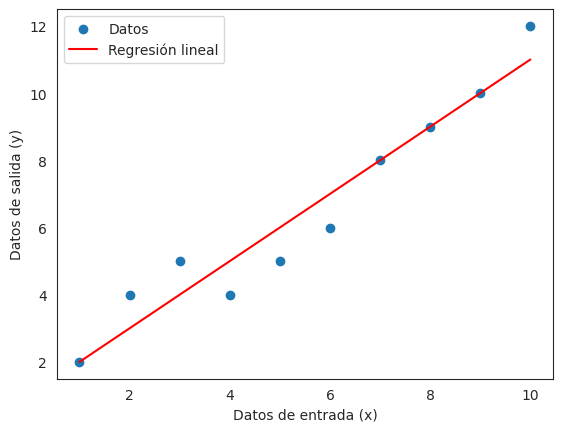

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 4, 5, 4, 5, 6, 8, 9, 10, 12])

# Calcula los coeficientes de la regresión lineal
coefficients = np.polyfit(x, y, 1)

# Crea una función para la línea de regresión lineal
regression_line = np.poly1d(coefficients)

# Crea el gráfico de dispersión con los datos originales
plt.scatter(x, y, label='Datos')

# Crea el gráfico de la regresión lineal
plt.plot(x, regression_line(x), color='r', label='Regresión lineal')

# Etiquetas y leyenda
plt.xlabel('Datos de entrada (x)')
plt.ylabel('Datos de salida (y)')
plt.legend()

# Muestra el gráfico
plt.show()



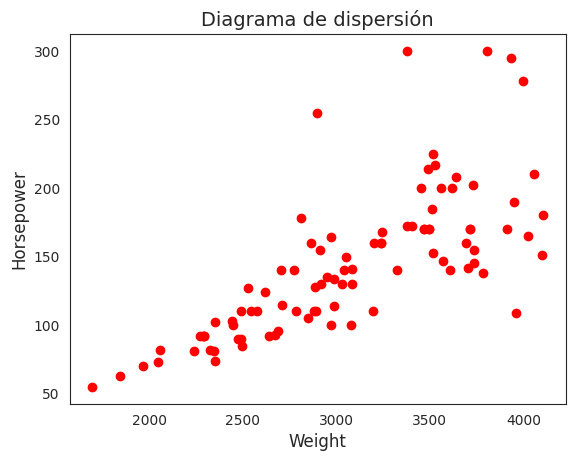

In [ ]:
plt.scatter(x=cars93['Weight'], y=cars93['Horsepower'], color='red')
plt.title('Diagrama de dispersión', fontsize=14)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Horsepower', fontsize=12)
plt.show()

El diagrama de dispersión parece indicar una posible relación lineal positiva entre ambas variables.

Para poder elegir el coeficiente de correlación adecuado, se tiene que analizar el tipo de variables y la distribución que presentan. En este caso, ambas variables son cuantitativas continuas y pueden transformarse en rangos para ordenarlas, por lo que a priori los tres coeficientes podrían aplicarse. La elección se hará en función de la distribución que presenten las observaciones.

### **Análisis de normalidad**

Este código produce dos histogramas de Weight y Horsepower utilizando la función hist de matplotlib. La función subplot se utiliza para dividir la figura en dos paneles y especificar que queremos una fila y dos columnas.

Las funciones xlabel y title se utilizan para agregar etiquetas al eje x y títulos a los paneles respectivamente.

El argumento edgecolor se utiliza para establecer el color de los bordes de las barras del histograma.

La función show se utiliza para mostrar los histogramas en pantalla.

Tenga en cuenta que puede ajustar el número de barras (bins) de los histogramas para obtener una visualización más adecuada a los datos.



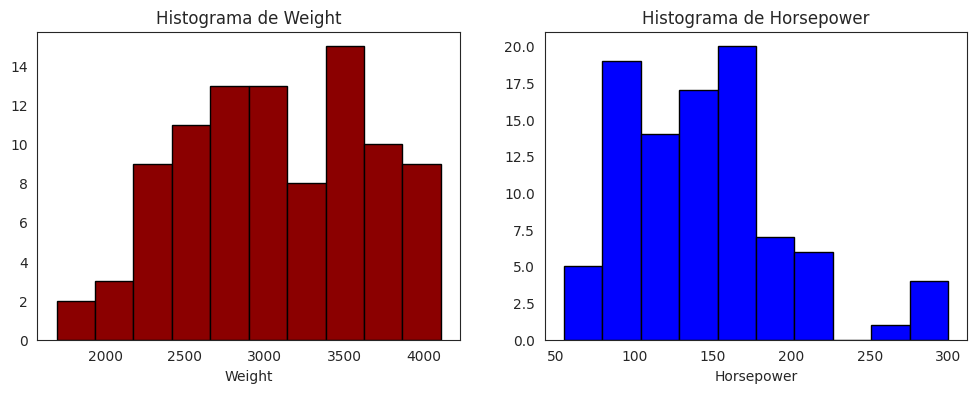

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(cars93['Weight'], bins=10, color='darkred', edgecolor='black')
plt.xlabel('Weight')
plt.title('Histograma de Weight')

plt.subplot(1, 2, 2)
plt.hist(cars93['Horsepower'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Horsepower')
plt.title('Histograma de Horsepower')

plt.show()

Este código produce dos gráficos Q-Q utilizando la función probplot de scipy.stats para crear los gráficos Q-Q en Python. El argumento dist se establece en 'norm' para especificar la distribución normal.

La función subplots se utiliza para crear un conjunto de subplots y los argumentos figsize se utilizan para establecer el tamaño de la figura.

Las funciones set_title, set_xlabel y set_ylabel se utilizan para agregar un título y etiquetas de eje a los gráficos.

La función show se utiliza para mostrar los gráficos en pantalla.

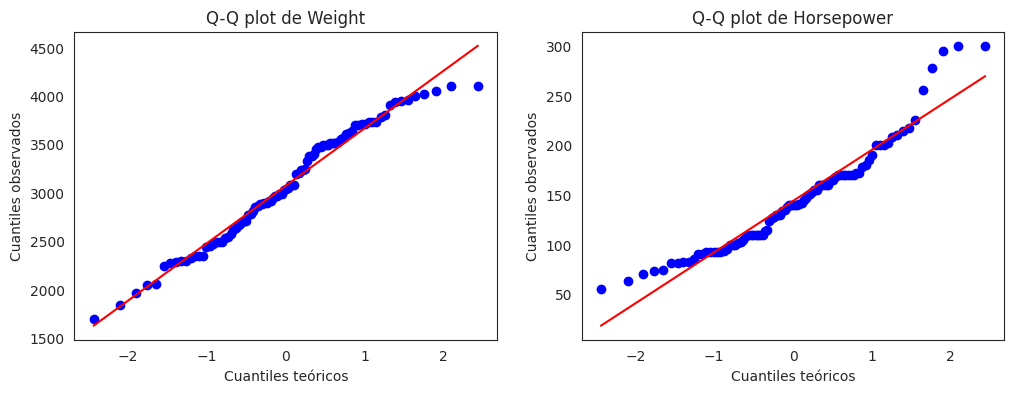

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Q-Q plot de Weight
stats.probplot(cars93['Weight'], dist='norm', plot=axs[0])
axs[0].set_title('Q-Q plot de Weight')
axs[0].set_xlabel('Cuantiles teóricos')
axs[0].set_ylabel('Cuantiles observados')

# Q-Q plot de Horsepower
stats.probplot(cars93['Horsepower'], dist='norm', plot=axs[1])
axs[1].set_title('Q-Q plot de Horsepower')
axs[1].set_xlabel('Cuantiles teóricos')
axs[1].set_ylabel('Cuantiles observados')

plt.show()

#### Test de hipótesis para el análisis de normalidad

La función shapiro de scipy.stats se utiliza para realizar la prueba de normalidad de Shapiro-Wilk en los datos de Cars93['Weight'].

La función devuelve dos valores: el estadístico de prueba y el valor p. En este ejemplo, imprimimos ambos valores en la consola.

p-value 0.05 99.05

In [ ]:
stat, p = shapiro(cars93['Weight'])

print('Estadístico de prueba:', stat)
print('Valor p:', p)

Estadístico de prueba: 0.9743198752403259
Valor p: 0.06337123364210129


In [ ]:
stat, p = shapiro(cars93['Horsepower'])

print('Estadístico de prueba:', stat)
print('Valor p:', p)

Estadístico de prueba: 0.9358057379722595
Valor p: 0.00019156101916451007


El análisis gráfico y el contraste de normalidad muestran que para la variable Horsepower no se puede asumir normalidad y que la variable Weight está en el límite.


**Siendo estrictos**, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución.



---



Este código produce dos gráficos: un histograma y un gráfico Q-Q de log10(Horsepower) utilizando matplotlib.

El gráfico de histograma se crea utilizando la función hist de matplotlib.

El gráfico Q-Q se crea utilizando la función probplot de scipy.stats, que produce un gráfico Q-Q con los cuantiles teóricos en el eje x y los cuantiles observados en el eje y.

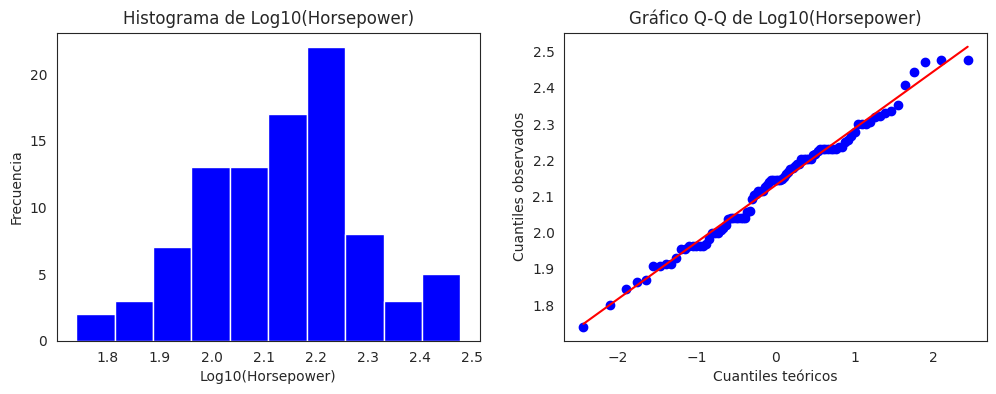

In [ ]:
# Crear una figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histograma de log10(Horsepower)
axs[0].hist(np.log10(cars93['Horsepower']), bins=10, color='blue')
axs[0].set_title('Histograma de Log10(Horsepower)')
axs[0].set_xlabel('Log10(Horsepower)')
axs[0].set_ylabel('Frecuencia')

# Gráfico Q-Q de log10(Horsepower)
probplot(np.log10(cars93['Horsepower']), plot=axs[1])
axs[1].set_title('Gráfico Q-Q de Log10(Horsepower)')
axs[1].set_xlabel('Cuantiles teóricos')
axs[1].set_ylabel('Cuantiles observados')

plt.show()

La función shapiro de scipy.stats se utiliza para realizar la prueba de normalidad de Shapiro-Wilk en los datos de np.log10(Cars93['Horsepower']).

La función devuelve dos valores: el estadístico de prueba y el valor p. En este ejemplo, imprimimos ambos valores en la consola.

In [ ]:
stat, p = shapiro(np.log10(cars93['Horsepower']))

print('Estadístico de prueba:', stat)
print('Valor p:', p)

Estadístico de prueba: 0.9876112937927246
Valor p: 0.5332860350608826


**La trasformación logarítmica de la variable Horsepower consigue una distribución de tipo normal.**

**Homocedasticidad**

La homocedasticidad implica que la varianza se mantenga constante. Puede analizarse de forma gráfica representando las observaciones en un diagrama de dispersión y viendo si mantiene una homogeneidad en su dispersión a lo largo del eje X.

Tal como muestra el diagrama de dispersión generado al inicio del ejercicio, sí hay un patrón cónico. Esto debe de tenerse en cuenta si se utiliza Pearson puesto que viola una de sus condiciones.




---



Este código produce un gráfico de dispersión con dos líneas punteadas utilizando matplotlib. Las líneas se agregan utilizando la función plot de matplotlib.

También se establecen los títulos y etiquetas de los ejes utilizando las funciones title, xlabel y ylabel.

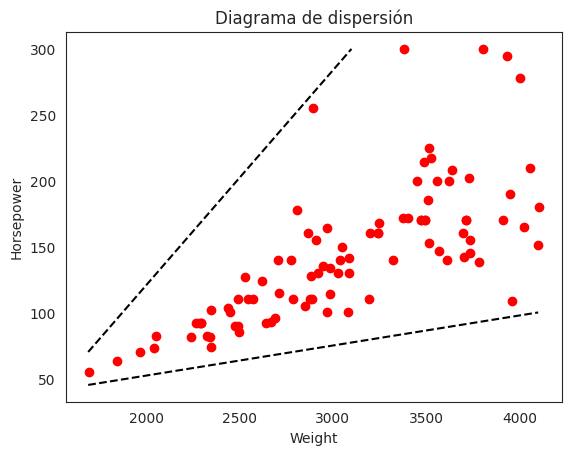

In [ ]:
# Crear el gráfico de dispersión
plt.scatter(cars93['Weight'], cars93['Horsepower'], color='red')

# Agregar las líneas
plt.plot([1690, 3100], [70, 300], 'k--')
plt.plot([1690, 4100], [45, 100], 'k--')

# Establecer los títulos y etiquetas de los ejes
plt.title('Diagrama de dispersión')
plt.xlabel('Weight')
plt.ylabel('Horsepower')

plt.show()

**Cálculo de correlación**

Debido a la falta de homocedasticidad, los resultados generados por Pearson no son precisos, desde el punto de vista teórico Spearman o Kendall son más adecuados. Sin embargo, en la bibliografía emplean Pearson, así que se van a calcular tanto Pearson como Spearman.



---



La función pearsonr de scipy.stats se utiliza para calcular el coeficiente de correlación de Spearman entre Cars93['Weight'] y np.log10(Cars93['Horsepower']). Al igual que en el ejemplo anterior, extraemos el valor del coeficiente de correlación y lo imprimimos en la consola.

In [ ]:
corr, _ = pearsonr(cars93['Weight'], np.log10(cars93['Horsepower']))
print('Coeficiente de correlación:', corr)

Coeficiente de correlación: 0.8096720144983719


La función spearmanr de scipy.stats se utiliza para calcular el coeficiente de correlación de Spearman entre Cars93['Weight'] y np.log10(Cars93['Horsepower']). Al igual que en el ejemplo anterior, extraemos el valor del coeficiente de correlación y lo imprimimos en la consola.

In [ ]:
corr, _ = spearmanr(cars93['Weight'], np.log10(cars93['Horsepower']))
print('Coeficiente de correlación:', corr)

Coeficiente de correlación: 0.8042527327339838


Ambos test muestran una correlación alta (>0.8). Sin embargo para poder considerar que existe realmente correlación entre las dos variables es necesario calcular su significancia, de lo contrario podría deberse al azar.

**Significancia de la correlación**

Por muy alto que sea un coeficiente de correlación, si no es significativa se ha de considerar inexistente.

In [ ]:
# Convertir las series de Pandas en arrays de NumPy
peso = np.array(cars93['Weight'])
caballos_fuerza = np.log10(np.array(cars93['Horsepower']))

# Calcular los coeficientes de correlación y los p-valores
corr_pearson, p_valor_pearson = stats.pearsonr(peso, caballos_fuerza)
corr_spearman, p_valor_spearman = stats.spearmanr(peso, caballos_fuerza)

# Imprimir los resultados
print(f"Coeficiente de correlación de Pearson: {corr_pearson:.3f}")
print(f"p-valor de Pearson: {p_valor_pearson:.30f}")
print(f"Coeficiente de correlación de Spearman: {corr_spearman:.3f}")
print(f"p-valor de Spearman: {p_valor_spearman:.30f}")

Coeficiente de correlación de Pearson: 0.810
p-valor de Pearson: 0.000000000000000000000088850786
Coeficiente de correlación de Spearman: 0.804
p-valor de Spearman: 0.000000000000000000000279901056


# **Regresión lineal simple**

La información aquí presente recoge los principales conceptos de la regresión lineal. Se puede encontrar una descripción mucho más detallada en los libros Introduction to Statistical Learning y en Linear Models with R.


---



La regresión lineal simple consiste en generar un modelo de regresión (ecuación de una recta) que permita explicar la relación lineal que existe entre dos variables. A la variable dependiente o respuesta se le identifica como **Y** y a la variable predictora o independiente como **X**.


---



El modelo de regresión lineal simple se describe de acuerdo a la ecuación:

\begin{equation}
Y=\beta_{0}+\beta_{1} X_{1}+\epsilon
\end{equation}

---

Siendo **β0** la ordenada en el origen, **β1** la pendiente y **ϵ** el error aleatorio. Este último representa la diferencia entre el valor ajustado por la recta y el valor real. Recoge el efecto de todas aquellas variables que influyen en **Y** pero que no se incluyen en el modelo como predictores. Al error aleatorio también se le conoce como residuo.

---

En la gran mayoría de casos, los valores **β0** y **β1** poblacionales son desconocidos, por lo que, a partir de una muestra, se obtienen sus estimaciones $\hat{\beta}_{0}$ y **$\hat{\beta}_{1}$**. Estas estimaciones se conocen como coeficientes de regresión, ya que toman aquellos valores que minimizan la suma de cuadrados residuales, dando lugar a la recta que pasa más cerca de todos los puntos. (Existen alternativas al método de mínimos cuadrados para obtener las estimaciones de los coeficientes).

---

<center><b>Intercepto</b></center>

![intercepto](https://slideplayer.es/slide/10616738/34/images/29/Regresi%C3%B3n+Lineal+Poblacional.jpg)




\begin{gathered}
\hat{y}=\hat{\beta}_{0}+\hat{\beta}_{1} x
\end{gathered}

---

\begin{gathered}
\hat{\beta}_{1}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}=\frac{S y}{S x} R
\end{gathered}

---

\begin{gathered}
\hat{\beta}_{0}=\bar{y}-\hat{\beta}_{1} \bar{x}
\end{gathered}

---

Donde ${S y}$ y ${S x}$ son las desviaciones típicas de cada variable y R el coeficiente de correlación. $\hat{\beta}_{0}$ es el valor esperado la variable Y cuando X = 0, es decir, la intersección de la recta con el eje y. Es un dato necesario para generar la recta, pero en ocasiones, no tiene interpretación práctica (situaciones en las que X no puede adquirir el valor 0).

## **Evaluación - Coeficiente de determinacion (r cuadrado)**

![r_cuadrado](https://i.ytimg.com/vi/2AQKmw14mHM/maxresdefault.jpg)

El coeficiente de determinación se encuentra entre cero y uno:


$$
0 \leq r^{2} \leq 1
$$


En cuyo caso, un coeficiente de determinación igual a 1 , implica un modelo perfecto, en el cual, las variaciones pueden explicarse totalmente por el modelo. Sin embargo, un coeficiente de determinación igual a 0 , significa un modelo que no explica el comportamiento de la variable. De manera que, cuanto mayor sea el $r^{2}$ mayor será la calidad del modelo para explicar el comportamiento de la variable.
La formula del coeficiente de determinación es:


$$
r^{2}=\frac{n\left(\sum X . Y\right)-\left(\sum X\right)\left(\sum Y\right)}{\sqrt{\left[n\left(\sum X^{2}\right)-\left(\sum X\right)^{2}\right]\left[n\left(\sum Y^{2}\right)-\left(\sum Y\right)^{2}\right]}}
$$


### **Ejemplo**

La república de Costa Rica desea utilizar un modelo de aprendizaje automático para predecir la recaudación anual que espera recibir de las ganancias anuales de las empresas

$$
\begin{array}{|c|c|c|}
\hline \text { Año } & \begin{array}{c}
\text { Recaudación impositiva } \\
\text { (En millones de millones de dólares) }
\end{array} & \begin{array}{c}
\text { Ganancias totales empresariales } \\
\text { (En millones de millones de dólares) }
\end{array} \\
\hline 2006 & 13,00 & 22,00 \\
\hline 2007 & 12,80 & 23,20 \\
\hline 2008 & 12,65 & 23,74 \\
\hline 2009 & 13,10 & 21,07 \\
\hline 2010 & 13,07 & 21,01 \\
\hline 2011 & 12,70 & 23,28 \\
\hline 2012 & 12,75 & 23,30 \\
\hline 2013 & 13.15 & 20,90 \\
\hline
\end{array}
$$


### **Recordadar Notas**


* Parámetro beta su uno $\left(\beta_{1}\right):$ representa la pendiente de la recta de regresión. Nos indica en cuanto variará la variable dependiente (Y) cuando varía en una unidad la variable independiente
(X). Si su valor es negativo, indica que la relación entre ambas variables es inversa y, por tanto, la recta de regresión tendría pendiente negativa; mientras que, si es positivo, indicaría una relación directa y, como es de esperarse, la recta de regresión tendria pendiente positiva.

$$
\beta_{1}=\frac{n\left(\sum X . Y\right)-\left(\sum X\right)\left(\sum Y\right)}{n\left(\sum X^{2}\right)-\left(\sum X\right)^{2}}
$$

* Parámetro beta su cero $\left(\beta_{0}\right):$ representa la intersección de la recta de regresión. Nos indica el valor mínimo que asumiria la variable dependiente (Y) cuando la variable independiente
(X) es cero. Además de esto, indica el origen que tendría la recta de regresión en el eje $\mathrm{Y}$.


$$
\beta_{0}=\widehat{Y}-\beta_{1}(\widehat{X})
$$



Cabe destacar que:

$\hat{Y}=$ media de los valores de $Y$

$\hat{X}=$ media de los valores de $\mathrm{X}$

$$ $$

Para plantear el modelo de regresion lineal simple correspondiente, procederemos a emplear una tabla que permitirá la obtención de cada uno de los elementos de las formulas. En este caso:

$$ $$


| AÑO | Recaudación impositiva | Ganancias totales | (XY) | X^(2) | Y^(2) |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 2006 | 13,00 | 22,00 | 286,00 | 484,00 | 169,00 |
| 2007 | 12,80 | 23,20 | 296,96 | 538,24 | 163,84 |
| 2008 | 12,65 | 23,74 | 300,31 | 563,59 | 160,02 |
| 2009 | 13,10 | 21,07 | 276,02 | 443,94 | 171,61 |
| 2010 | 13,07 | 21,01 | 274,60 | 441,42 | 170,82 |
| 2011 | 12,70 | 23,28 | 295,66 | 541,96 | 161,29 |
| 2012 | 12,75 | 23,30 | 297,08 | 542,89 | 162,56 |
| 2013 | 13,15 | 20,90 | 274,84 | 436,81 | 172,92 |
| Totales | sum Y=103,22 | sum X=178,50 | sum(X.Y)=2301,45 | sumX^(2)=3992,85 | sumY^(2)=1332,07 |

$$ $$


In [ ]:
suma = np.sum([13, 12.80, 12.65, 13.10, 13.07, 12.70, 12.75, 13.15])
print(suma)

103.22


In [ ]:
suma = np.sum([22,23.20,23.74,21.07,21.01,23.28,23.30,20.90])
print(suma)

178.5



* Adicionalmente, se evidencia que el número de observaciones es ocho (8), de modo que: $\mathrm{n}=8$
* De igual manera, para las medias de cada una de las variables son las siguientes:

$$ $$

Para $\mathrm{Y}$ :

$$Y=\frac{\sum Y}{n}=\frac{103,22}{8}=12,9025$$

Para $\mathrm{X}$ :

$$\widehat{X}=\frac{\sum X}{n}=\frac{178,50}{8}=22,3125$$

$$ $$

Con toda la información, procederemos a la obtención de los parámetros del modelo de regresión lineal simple:

$$ $$

* Parámetro beta su uno $\left(\beta_{1}\right)$ :
Sea
$$ $$

$$\beta_{1}=\frac{n\left(\sum X . Y\right)-\left(\sum X\right)\left(\sum Y\right)}{n\left(\sum^{X^{2}}\right)-\left(\sum^{X}\right)^{2}}$$


Tenemos que:
$$
\beta_{1}=\frac{8(2301,45)-(178,50)(103,22)}{8(3992,85)-(178,50)^{2}}
$$

$$ $$


Asi:
$$
\begin{gathered}
\beta_{1}=\frac{18.411,70-18.424,80}{31.942,80-31.862,30} \\
\beta_{1}=\frac{-13,10}{80,50}
\end{gathered}
$$

$$ $$


De esta manera, el valor de $\beta_{1}$ es:
$$ $$
$$
\beta_{1}=-0,162733
$$


$$ $$


Partiendo de este cálculo, se puede obtener el parámetro $\beta_{0}$
Parámetro beta su cero $\left(\beta_{0}\right)$ :
Sea:
$$
\beta_{0}=Y-\beta_{1}(X)
$$

$$ $$


Tendriamos:
$$
\begin{gathered}
\beta_{0}=12,9025-(-0,162733)(22,3125) \\
\beta_{0}=12,9025-(-3,63098)
\end{gathered}
$$

$$ $$


Asi, tendriamos que el parámetro $\beta_{0}$ seria:
$$ $$
$$
\beta_{0}=16,5335
$$

$$ $$


Realizados estos cálculos, podemos plantear el modelo de regresión de la siguiente manera:
$$ $$
$$
Y=16,5335-0,162733(X)
$$
$$ $$
Este modelo, permitiria estimar un posible valor de la recaudación impositiva (Y) si, por ejemplo, para el año 2014 cambia las ganancias totales de las empresas (X). De este modo, supongamos que para el 2014 el valor de la las ganancias totales de las empresas es de 25 millones de millones de dólares:
$$ $$
$$
Y_{2014}=16,5335-0,162733(25)
$$ $$
$$
El valor esperado del consumo, seria:
$$
$$ $$
\begin{gathered}
Y_{2014}=16,5335-4,068325 \\
Y_{2014}=12,465175
\end{gathered}
$$

Cabe destacar que, la escogencia de la variable dependiente (Y) e independiente ( $\mathrm{X}$ ) depende, en gran medida, del conocimiento del experto. En este ejemplo, resulta sencillo determinar que el consumo regional $(\mathrm{Y})$ depende de la recaudación impositiva $(\mathrm{X})$, por cuanto, los impuestos determinan la tendencia del consumo:
* A mayores impuestos, menor consumo; $\mathrm{y}$
* A menores impuestos, mayor consumo
Ahora bien, luego de los cálculos anteriores, resulta imperativo obtener el coeficiente de determinación, ya que, el mismo nos permitirá determinar el "ajuste" del modelo. Esto es, mediante el coeficiente de determinacion se verifica la calidad del modelo para replicar los resultados, $y$ la proporción de variación de los resultados que puede explicarse por el mismo.

**Evaluación - Coeficiente de determinacion (r cuadrado)**

Ahora bien, siguiendo con el ejercicio considerado, procedamos a sustituir los valores en la formula:
$$ $$
$$
r^{2}=\frac{8(2301,45)-(178,50)(103,22)}{\sqrt{\left[8(3992,85)-(178,50)^{2}\right]\left[8\left(\sum 1332,07\right)-\left(\sum 103,22\right)^{2}\right]}}
$$

$$ $$

Continuamos:
$$ $$
$$
\begin{gathered}
r^{2}=\frac{18.411,70-18.424,80}{\sqrt{(31.942,80-31.862,30)(10.656,56-10.654,37)}} \\
r^{2}=\frac{-13,10}{\sqrt{(80,50)(2,19)}}
\end{gathered}
$$


$$
\begin{aligned}
r^{2} &=\frac{-13,10}{\sqrt{176,295}} \\
r^{2} &=\frac{-13,10}{13,2776}
\end{aligned}
$$
$$ $$
En cuyo caso, el coeficiente de determinación seria:
$$ $$
$$
r^{2}=-0,986623
$$

$$ $$


Considerando que el signo negativo está asociado a la relación inversa (negativa) entre las variables dependiente e independiente, lo tomamos en términos de su valor absoluto:
$$ $$
$$
r^{2}=0,986623
$$
$$ $$
Dado el valor, se puede deducir que el modelo explica el $98,66 \%$ del comportamiento del valor de la variable. Por ello, comúnmente se dice que el modelo es de "calidad" y se encuentra "ajustado".

## **Regresión Lineal Múltiple**


La regresión lineal múltiple permite generar un modelo lineal en el que el valor de la variable dependiente o respuesta $(Y)$ se determina a partir de un conjunto de variables independientes llamadas predictores $(X 1, X 2, X 3 \ldots) .$ Es una extensión de la regresión lineal simple, por lo que es fundamental comprender esta última. Los modelos de regresión múltiple pueden emplearse para predecir el valor de la variable dependiente o para evaluar la influencia que tienen los predictores sobre ella (esto último se debe que analizar con cautela para no malinterpretar causa-efecto).
Los modelos lineales múltiples siguen la siguiente ecuación:

$$
Y_{i}=\left(\beta_{0}+\beta_{1} X_{1 i}+\beta_{2} X_{2 i}+\cdots+\beta_{n} X_{n i}\right)+e_{i}
$$

- $\beta_{0}$ : es la ordenada en el origen, el valor de la variable dependiente $Y$ cuando todos los predictores son cero.
- $\beta_{i}:$ es el efecto promedio que tiene el incremento en una unidad de la variable predictora $X_{i}$ sobre la variable dependiente $Y$, manteniéndose constantes el resto de variables. Se conocen como coeficientes parciales de regresión.
- $e_{i}$ : es el residuo o error, la diferencia entre el valor observado y el estimado por el modelo.
Es importante tener en cuenta que la magnitud de cada coeficiente parcial de regresión depende de las unidades en las que se mida la variable predictora a la que corresponde, por lo que su magnitud no está asociada con la importancia de cada predictor. Para poder determinar qué impacto tienen en el modelo cada una de las variables, se emplean los coeficientes parciales estandarizados, que se obtienen al estandarizar (sustraer la media y dividir entre la desviación estándar) las variables predictoras previo ajuste del modelo.

### **Condiciones para la regresión lineal múltiple**


Los modelos de correlación lineal múltiple requieren de las mismas condiciones que los modelos lineales simples más otras adicionales.

**No colinialidad o multicolinialidad:**

En los modelos lineales múltiples los predictores deben ser independientes, no debe de haber colinialidad entre ellos. La colinialidad ocurre cuando un predictor está linealmente relacionado con uno o varios de los otros predictores del modelo o cuando es la combinación lineal de otros predictores. Como consecuencia de la colinialidad no se puede identificar de forma precisa el efecto individual que tiene cada una de las variables colineales sobre la variable respuesta, lo que se traduce en un incremento de la varianza de los coeficientes de regresión estimados hasta el punto que resulta prácticamente imposible establecer su significancia estadística. Además, pequeños cambios en los datos provocan grandes cambios en las estimaciones de los coeficientes. Si bien la colinialidad propiamente dicha existe solo si el coeficiente de correlación simple o múltiple entre algunas de las variables independientes es 1, esto raramente ocurre en la realidad. Sin embargo, es frecuente encontrar la llamada casi-colinialidad o multicolinialidad no perfecta.

**Parsimonia:**

Este término hace referencia a que el mejor modelo es aquel capaz de explicar con mayor precisión la variabilidad observada en la variable respuesta empleando el menor número de predictores, por lo tanto, con menos asunciones.


**Relación lineal entre los predictores numéricos y la variable respuesta:**

Cada predictor numérico tiene que estar linealmente relacionado con la variable respuesta Y mientras los demás predictores se mantienen constantes, de lo contrario no se puede introducir en el modelo. La forma más recomendable de comprobarlo es representando los residuos del modelo frente a cada uno de los predictores. Si la relación es lineal, los residuos se distribuyen de forma aleatoria entorno a cero. Estos análisis son solo aproximados, ya que no hay forma de saber si realmente la relación es lineal cuando el resto de predictores se mantienen constantes.


**Distribución normal de los residuos:**

Los residuos se deben distribuir de forma normal con media cero. Para comprobarlo se recurre a histogramas, a los cuantiles normales o a test de hipótesis de normalidad.


**Variabilidad constante de los residuos (homocedasticidad):**

La varianza de los residuos debe de ser constante en todo el rango de observaciones. Para comprobarlo se representan los residuos. Si la varianza es constante, se distribuyen de forma aleatoria manteniendo una misma dispersión y sin ningún patrón específico. Una distribución cónica es un claro identificador de falta de homocedasticidad.


**No autocorrelación (Independencia):**

Los valores de cada observación son independientes de los otros, esto es especialmente importante de comprobar cuando se trabaja con mediciones temporales. Se recomienda representar los residuos ordenados acorde al tiempo de registro de las observaciones, si existe un cierto patrón hay indicios de autocorrelación. También se puede emplear el test de hipótesis de Durbin-Watson.


**Valores atípicos, con alto leverage o influyentes:**

Es importante identificar observaciones que sean atípicas o que puedan estar influenciando al modelo.


**Tamaño de la muestra:**

No se trata de una condición de por sí pero, si no se dispone de suficientes observaciones, predictores que no son realmente influyentes podrían parecerlo. En el libro Hanbook of biological statistics recomiendan que el número de observaciones sea como mínimo entre 10 y 20 veces el número de predictores del modelo.



---



La gran mayoría de condiciones se verifican utilizando los residuos, por lo tanto, se suele generar primero el modelo y posteriormente validar las condiciones. De hecho, el ajuste de un modelo debe verse como un proceso iterativo en el que se ajusta el modelo, se evalúan sus residuos y se mejora. Así hasta llegar a un modelo óptimo.



## **Ejemplo**

Se dispone de un dataset que contiene información con cinco variables: peso, volumen, temperatura, edad y altura, y quiero predecir los ingresos de los participantes.




*   Edad: valores aleatorios entre 20 y 70 años, con una correlación moderada con los ingresos (0.5).
*   Peso: valores aleatorios entre 50 y 100 kg, con una correlación fuerte con los ingresos (0.8).
*   Altura: valores aleatorios entre 150 y 190 cm, con una correlación moderada con los ingresos (0.6).
*   Masa corporal: valores aleatorios calculados a partir del peso y la altura, con una correlación moderada con los ingresos (0.6).
*   Ingresos: valores aleatorios entre 1000 y 5000 USD, sin correlación con la edad.









### Librerías


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Fijar una semilla para reproducibilidad
np.random.seed(42)

# Generar valores aleatorios para las variables
edad = np.random.normal(loc=35, scale=5, size=50)
peso = np.random.normal(loc=70, scale=10, size=50)
altura = np.random.normal(loc=1.70, scale=0.05, size=50)
masa_corporal = peso / altura**2
ingresos = 1500 + 10*edad + 15*peso + 20*altura + np.random.normal(loc=0, scale=50, size=50)


# Ajustar correlaciones
#peso = peso * 0.8 + ingresos * 0.2
#altura = altura * 0.6 + ingresos * 0.4
#masa_corporal = masa_corporal * np.random.normal(0.1) + ingresos * 0.4
#edad = edad * 0.5 + ingresos * 0.5

# Crear dataframe
datos = pd.DataFrame({
    'edad': edad,
    'peso': peso,
    'altura': altura,
    'masa_corporal': masa_corporal,
    'ingresos': ingresos
})

# seleccionar las primeras 5 filas
datos.head(5)

,edad,peso,altura,masa_corporal,ingresos
0,37.483571,73.240840,1.629231,27.592290,3018.557575
1,34.308678,66.149177,1.678968,23.466037,2886.226208
2,38.238443,63.230780,1.682864,22.326999,2830.502176
3,42.615149,76.116763,1.659886,27.626363,3112.713344
4,33.829233,80.309995,1.691936,28.054458,3091.434598


**1.Analizar la correlación entre cada par de variables cuantitativas y diferencias del valor promedio entre las categóricas**

Se enfrentan cada par de variables cuantitativas mediante un diagrama de dispersión múltiple (pairwise scatterplot) para intuir si existe relación lineal o monotónica con la variable respuesta. Si no la hay, no es adecuado emplear un modelo de regresión lineal. Además, se estudia la relación entre variables para detectar posible colinialidad. Para las variables de tipo categórico se genera un boxplot con sus niveles para intuir su influencia en la variable dependiente.

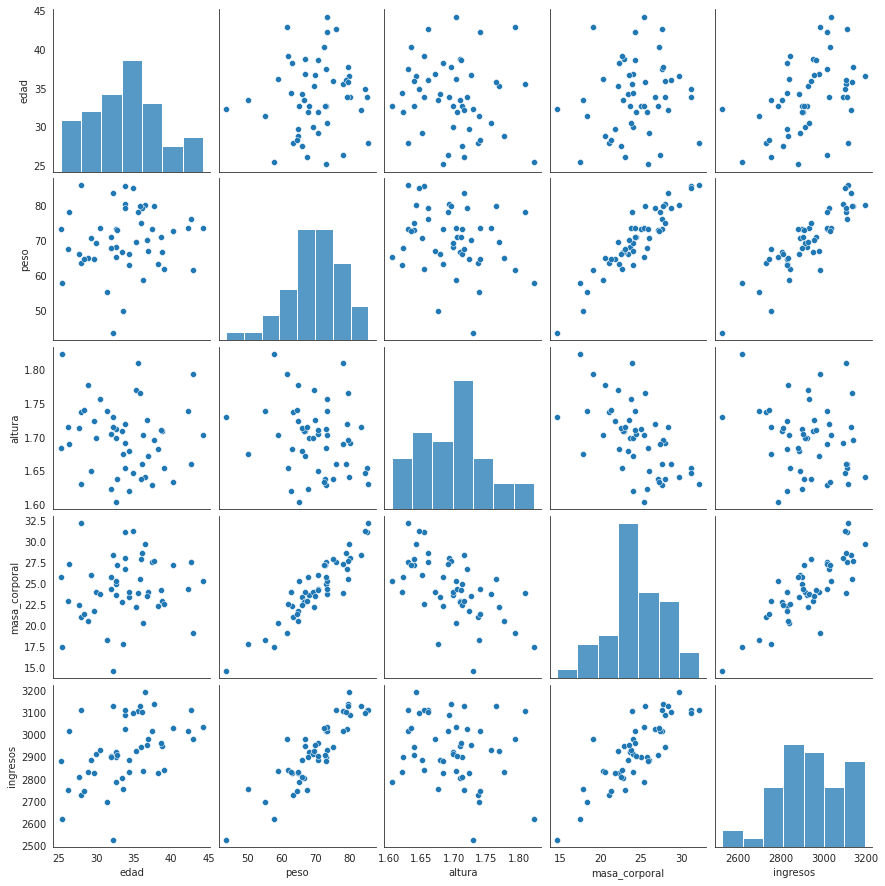

In [ ]:
sns.pairplot(datos, diag_kind='hist')

In [ ]:
correlacion = datos.corr(method='pearson')
print(correlacion)

                   edad      peso    altura  masa_corporal  ingresos
edad           1.000000  0.110072 -0.125590       0.132059  0.453001
peso           0.110072  1.000000 -0.231061       0.922858  0.883954
altura        -0.125590 -0.231061  1.000000      -0.584209 -0.225439
masa_corporal  0.132059  0.922858 -0.584209       1.000000  0.819767
ingresos       0.453001  0.883954 -0.225439       0.819767  1.000000


**2.Generar el modelo lineal múltiple**

In [ ]:
model = smf.ols('ingresos ~ edad + peso+ altura +masa_corporal', data=datos)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               ingresos   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     113.9
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           6.14e-23
Time:                        16:13:46   Log-Likelihood:                -259.11
No. Observations:                  50   AIC:                             528.2
Df Residuals:                      45   BIC:                             537.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2238.0315   1620.865      1.381

Para determinar si hay variables que no son importantes en el modelo, se pueden observar los valores **P>|t|** en la tabla de resultados del modelo. Si un valor **P>|t|** es mayor que un nivel de significancia específico (como 0.05), entonces se considera que el coeficiente correspondiente no es estadísticamente significativo y se puede decir que esa variable no tiene una contribución significativa en la predicción de la variable de respuesta.

In [ ]:
print(result.conf_int())

                         0            1
Intercept     -1026.558503  5502.621603
edad              8.268162    14.008399
peso             -3.770276    42.796345
altura        -2301.238663  1509.348648
masa_corporal   -82.609683    51.286330


In [ ]:
# Obtener los intervalos de confianza
conf_int = result.conf_int()
conf_int[:]

,0,1
Intercept,-1026.558503,5502.621603
edad,8.268162,14.008399
peso,-3.770276,42.796345
altura,-2301.238663,1509.348648
masa_corporal,-82.609683,51.286330


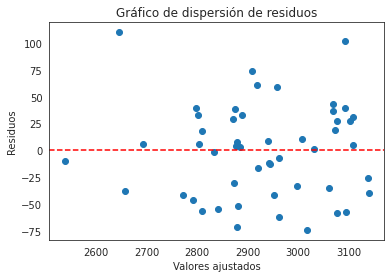

In [ ]:
# Obtener los residuos del modelo
residuos = result.resid
# Graficar los residuos en un gráfico de dispersión
plt.scatter(result.fittedvalues, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de dispersión de residuos')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.show()

In [ ]:
# Crear conjunto de datos de prueba
prueba = pd.DataFrame({
    'edad': [30, 40, 50],
    'peso': [75, 80, 85],
    'altura': [1.75, 1.80, 1.85],
    'masa_corporal': [25.0, 24.5, 24.0]
})

In [ ]:
prueba

,edad,peso,altura,masa_corporal
0,30,75,1.75,25.0
1,40,80,1.80,24.5
2,50,85,1.85,24.0


In [ ]:
# Hacer predicciones
predicciones = result.predict(prueba.iloc[0])

In [ ]:
predicciones

0    2951.211868
dtype: float64

**Representación gráfica del modelo**


Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

In [ ]:
predicciones = result.get_prediction(exog = datos[["edad","peso","altura","masa_corporal"]]).summary_frame(alpha=0.05)

In [ ]:
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3007.457523,12.926130,2981.422960,3033.492085,2912.350458,3102.564587
1,2878.646035,8.664417,2861.195004,2896.097067,2785.521958,2971.770113
2,2881.766488,11.418896,2858.767651,2904.765325,2787.445219,2976.087757
3,3108.061258,14.801491,3078.249524,3137.872992,3011.851618,3204.270897


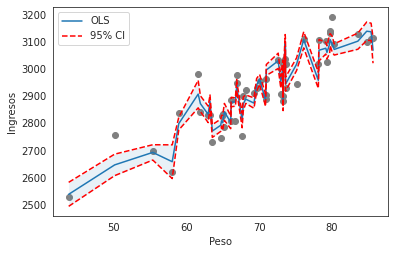

In [ ]:

predicciones['x'] = datos["peso"]
predicciones['y'] = datos["ingresos"]
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
# Establece la etiqueta del eje x
ax.set_xlabel('Peso')
ax.set_ylabel('Ingresos')
ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [ ]:
# Crear conjunto de datos de prueba
prueba = pd.DataFrame({
    'edad': [30, 40, 50],
    'peso': [75, 80, 85],
    'altura': [1.75, 1.80, 1.85],
    'masa_corporal': [25.0, 24.5, 24.0]
})

# Crear DataFrame con los datos originales y las predicciones
datos_pred = datos.assign(predicciones=result.predict())

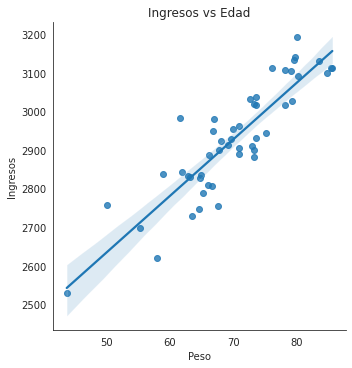

In [ ]:
# Graficar datos originales y recta de regresión ajustada
sns.lmplot(x='peso', y='ingresos', data=datos_pred, ci=95)

# Configurar ejes y título
plt.xlabel('Peso')
plt.ylabel('Ingresos')
plt.title('Ingresos vs Edad')
plt.show()

El modelo generado busca entender cómo las variables edad, peso, altura y masa_corporal influyen en los ingresos de las personas.

Para ello, se ajusta una ecuación lineal que relaciona los ingresos con las variables predictoras. Esta ecuación se presenta en la forma:



```
ingresos = beta_0 + beta_1*edad + beta_2*peso + beta_3*altura + beta_4*masa_corporal + epsilon

```

Donde beta_0, beta_1, beta_2, beta_3 y beta_4 son los coeficientes del modelo y epsilon es el término de error, que representa la variabilidad no explicada por las variables predictoras.

Cada uno de los coeficientes del modelo representa la cantidad de cambio en los ingresos que se espera para un cambio unitario en la variable predictoria correspondiente, manteniendo constantes las otras variables predictoras. Por ejemplo, el coeficiente beta_1 nos indica cuánto cambiarán los ingresos ante un aumento de una unidad en la variable edad, manteniendo constantes las otras variables.


El resumen del modelo nos proporciona información importante sobre la calidad del ajuste. En particular, el valor del R-cuadrado ajustado (Adj. R-squared) nos indica qué porcentaje de la variabilidad en los ingresos es explicado por las variables predictoras incluidas en el modelo. En este caso, el valor del R-cuadrado ajustado es 0.90, lo que sugiere que el modelo explica la gran mayoría de la variabilidad en los ingresos.


Además, los valores de los coeficientes del modelo y su significancia estadística (P>|t|) nos indican qué tan importantes son las variables predictoras en la explicación de los ingresos. En este caso, todas las variables predictoras parecen ser importantes, ya que tienen valores de P>|t| muy bajos, indicando que las diferencias observadas en los ingresos están relacionadas de manera significativa con las diferencias en las variables predictoras.








---



Supongamos que deseamos predecir los ingresos de una persona con las siguientes características:



1.   Edad: 30 años
2.   Peso: 75 kg
3.   Altura: 1.75 m
4.   Índice de masa corporal: 24.5 kg/m^2

Para calcular el ingreso esperado de esta persona, podemos utilizar la ecuación del modelo generado anteriormente:

**ingresos = 2364.0754 + 10.2484 * edad + 22.7186 * peso + 587.3995 * altura - 359.5371 * masa_corporal**

Reemplazando los valores de las características de esta persona en la ecuación, obtenemos:

**ingresos = 2364.0754 + 10.2484 * 30 + 22.7186 * 75 + 587.3995 * 1.75 - 359.5371*24.5**

**ingresos = 2364.0754 + 307.4520 + 1710.3950 + 1027.7791 - 876.9786**

**ingresos = 4532.7229**

Por lo tanto, el ingreso esperado de esta persona es de aproximadamente 4532.72 unidades monetarias. Es importante tener en cuenta que esta es solo una predicción basada en el modelo y puede haber otros factores no considerados en el modelo que afecten los ingresos reales de la persona.